In [1]:
import numpy as np
from highorder import *
from itertools import product, permutations

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [57]:
class Mesh_QuadGrid:
    def __init__(self):
        pass

    def InitFromArrays(self, arrays):
        if not(isinstance(arrays, tuple) or isinstance(arrays, list)):
            raise TypeError("Input should be a list or a tuple of arrays.")
        self.dim = len(arrays)
        self.grid = np.meshgrid(*arrays)
        self.arrays = arrays
        self.nodes = np.array([i for i in product(*self.arrays)])
        self.num_of_nodes = np.array([np.size(i) for i in self.arrays])
        self.total_nodes = np.prod(self.num_of_nodes)
        self.nodes_ID = np.array([i for i in range(self.total_nodes)])
        self.num_of_elements = self.num_of_nodes - 1
        self.total_elements = np.prod(self.num_of_elements)
        
        self.elements = np.array([i for i in range(self.total_elements)])
        self.element_nodes = np.zeros([self.total_elements, np.power(2, self.dim)])
        for counter in range(self.total_elements):
            if self.dim == 1:
                self.element_nodes[counter, :] = [counter, counter + 1]
            elif self.dim == 2:
                self.element_nodes[counter, :] = [counter, counter + 1,
                                                  (counter + 1) * self.num_of_nodes[0] + 1,
                                                  (counter + 1) * self.num_of_nodes[0] + 2]
        
    def PrintInfo(self):
        print("Dimension is", self.dim)
        print("Nodes - X, Y:", self.num_of_nodes, "- Total:", self.total_nodes)
        print("Elements - X, Y:", self.num_of_elements, "- Total:", self.total_elements)
        
    def PlotNodes(self):
        if self.dim == 1:
            plt.plot(self.nodes, np.zeros(self.nodes.size), 'bo')
        elif self.dim == 2:
            plt.scatter(self.nodes[:, 0], self.nodes[:, 1], s = 5)

class QuadElement:
    def __init__(self, x, y, ID):
        self._x = np.array([np.min(x), np.max(x)])
        self._y = np.array([np.min(y), np.max(y)])
        self.ID = ID
    
class LineElement:
    def __init__(self, x, ID):
        self.x = np.array([np.min(x), np.max(x)])
        self.ID = ID

class FunctionalBase:
    def __init__(self):
        pass
    
class LagrangeBase_GLL(FunctionalBase):
    def __init__(self, dof, quad):
        self.dof = dof
        self.quad_points = quad
        self.quad_coord, _ = GaussLobattoLegendreQuadrature( quad )
        self.C = 0
        self.domain_length = 2
        if self.dof == self.quad_points:
            self.H = np.eye(self.dof) # Mass matrix
            self.D = LagrangeDerivativePolynomialGLLBased(self.dof) # Derivative matrix
        else:
            raise Exception("Not implemented the overintegration in LagrangeBase yet... :(") 
    
class FiniteElement_1D_Line(LineElement):
    def __init__(self, x, ID):
        super().__init__(x, ID)
        self._base = None
        self._prev = None
        self._prev = None
        self.jacob = None
        self.dof_pos = None # Degrees of freedom positions in the global alpha
        self.quad_coord = None
    
    @property
    def base(self):
        return self._base
    
    @base.setter
    def base(self, base):
        self._base = base
        self.jacob = np.diff(self.x) / self.base.domain_length
        self.quad_coord = (self.base.quad_coord - self.base.quad_coord[0]) * self.jacob + self.x[0]
        
    @base.deleter
    def base(self):
        del self._base
        
    @property
    def H(self):
        return self.base.H
    
    @H.deleter
    def H(self):
        del self.base.H
        
    @property
    def D(self):
        return self.base.D
    
    @D.deleter
    def D(self):
        del self.base.D
    
    def PrintInfo(self):
        print("x is:", self._x)
        print("My ID is:", self.ID)
        print("My quadrature points are in coord:", self._quad_points)
        
    def SetPrev(self, p):
        self._prev = p
        self._prev._next = self
        
    def SetNext(self, n):
        self._next = n
        self._next._prev = self

class FiniteElement_2D_Quad(QuadElement):
    def __init__(self, x, y, ID):
        super().__init__(x, y, ID)
        
    def PrintInfo(self):
        print("x is:", self._x)
        print("y is:", self._y)
        print("My ID is:", self.ID)
        


In [58]:
base = LagrangeBase_GLL(5, 5)

e = FiniteElement_1D_Line([0.02, 0.01], 1)


In [59]:
base.quad_coord

array([-1.        , -0.65465367,  0.        ,  0.65465367,  1.        ])

In [64]:
mesh = Mesh_QuadGrid()
mesh.InitFromArrays((np.array([0, 1, 1.5]),np.array([0, 1, 1.5, 2])))
mesh.nodes_ID

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [61]:
mesh.PrintInfo()

Dimension is 2
Nodes - X, Y: [3 4] - Total: 12
Elements - X, Y: [2 3] - Total: 6


In [62]:
mesh2 = Mesh_QuadGrid()
mesh2.InitFromArrays((np.array([0, 1, 1.5]),))
mesh2.elements

array([0, 1])

In [63]:
mesh2.nodes

array([[ 0. ],
       [ 1. ],
       [ 1.5]])

In [21]:
mesh2.PrintInfo()
mesh2.elements

Dimension is 1
Nodes - X, Y: [3] - Total: 3
Elements - X, Y: [2] - Total: 2


array([0, 1])

In [159]:
element = FiniteElement_1D_Line([2, -10], 1)
element.SetQuadPoints_GLL(5)
element.PrintInfo()

x is: [-10   2]
My ID is: 1
My quadrature points are in coord: [-10.          -7.92792202  -4.          -0.07207798   2.        ]


In [137]:
print(np.array([x for x in product(np.array([0, 1]), np.array([0, 1]))]))
print([x for x in product(np.array([0, 1]))])

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[(0,), (1,)]


In [144]:
mesh = Mesh_QuadGrid()

mesh.InitFromArrays((GLLSpace(0, 1, 11), GLLSpace(-1, 1, 7)))
mesh.PrintInfo()

Dimension is 2
Nodes - X, Y: [11  7] - Total: 77
Elements - X, Y: [10  6] - Total: 60


In [145]:
np.squeeze(mesh._nodes)

array([[ 0.        , -1.        ],
       [ 0.        , -0.8302239 ],
       [ 0.        , -0.46884879],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.46884879],
       [ 0.        ,  0.8302239 ],
       [ 0.        ,  1.        ],
       [ 0.03299928, -1.        ],
       [ 0.03299928, -0.8302239 ],
       [ 0.03299928, -0.46884879],
       [ 0.03299928,  0.        ],
       [ 0.03299928,  0.46884879],
       [ 0.03299928,  0.8302239 ],
       [ 0.03299928,  1.        ],
       [ 0.10775826, -1.        ],
       [ 0.10775826, -0.8302239 ],
       [ 0.10775826, -0.46884879],
       [ 0.10775826,  0.        ],
       [ 0.10775826,  0.46884879],
       [ 0.10775826,  0.8302239 ],
       [ 0.10775826,  1.        ],
       [ 0.21738234, -1.        ],
       [ 0.21738234, -0.8302239 ],
       [ 0.21738234, -0.46884879],
       [ 0.21738234,  0.        ],
       [ 0.21738234,  0.46884879],
       [ 0.21738234,  0.8302239 ],
       [ 0.21738234,  1.        ],
       [ 0.35212093,

<IPython.core.display.Javascript object>


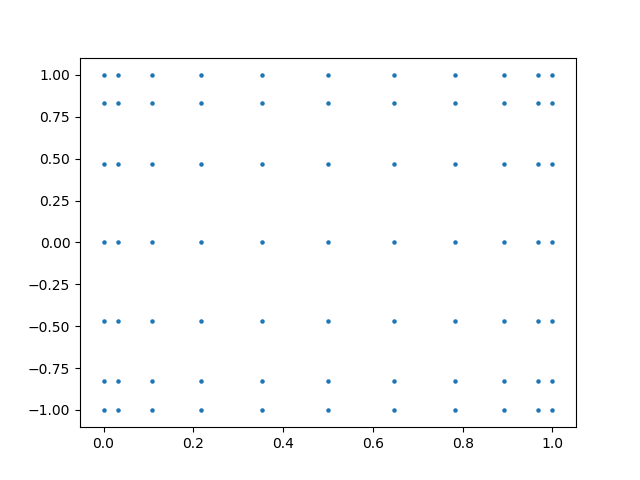

In [146]:
mesh.PlotNodes()

In [12]:
mesh = Mesh_QuadGrid()

mesh.InitFromArrays((GLLSpace(0, 1, 11), GLLSpace(-1, 1, 7)))

In [8]:
mesh.PrintInfo()

Dimension is 2
Nodes are:
[ 0.0, -1.0 ]
[ 0.0, -0.830223896279 ]
[ 0.0, -0.468848793471 ]
[ 0.0, 0.0 ]
[ 0.0, 0.468848793471 ]
[ 0.0, 0.830223896279 ]
[ 0.0, 1.0 ]
[ 0.032999284796, -1.0 ]
[ 0.032999284796, -0.830223896279 ]
[ 0.032999284796, -0.468848793471 ]
[ 0.032999284796, 0.0 ]
[ 0.032999284796, 0.468848793471 ]
[ 0.032999284796, 0.830223896279 ]
[ 0.032999284796, 1.0 ]
[ 0.107758263168, -1.0 ]
[ 0.107758263168, -0.830223896279 ]
[ 0.107758263168, -0.468848793471 ]
[ 0.107758263168, 0.0 ]
[ 0.107758263168, 0.468848793471 ]
[ 0.107758263168, 0.830223896279 ]
[ 0.107758263168, 1.0 ]
[ 0.217382336502, -1.0 ]
[ 0.217382336502, -0.830223896279 ]
[ 0.217382336502, -0.468848793471 ]
[ 0.217382336502, 0.0 ]
[ 0.217382336502, 0.468848793471 ]
[ 0.217382336502, 0.830223896279 ]
[ 0.217382336502, 1.0 ]
[ 0.352120932207, -1.0 ]
[ 0.352120932207, -0.830223896279 ]
[ 0.352120932207, -0.468848793471 ]
[ 0.352120932207, 0.0 ]
[ 0.352120932207, 0.468848793471 ]
[ 0.352120932207, 0.830223896279 ]


In [52]:
b = (x, x)
a = np.meshgrid(*b)

In [53]:
a


[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]